In [1]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf

# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

# Keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.datasets import mnist

### Looping through to get Training Images

In [2]:
from keras.preprocessing import image
image_size = (28,28)
from keras.preprocessing.image import img_to_array

In [3]:
##(X_train, y_train) filepath = "../Images/test2.png"
X_train = []
y_train = []
waldo_images = []
first = 1
second = 0
third = 0
for i in range(10):
    for j in range(16):
        for k in range(16):
            try:
                from keras.preprocessing import image
                filepath = f"64-gray/notwaldo/{first}_{second}_{third}.jpg"
                im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
                image = img_to_array(im)
                image /= 255
                img = image.flatten().reshape(-1, 28*28)
                img = 1 - img
                X_train.append(img)
                y_train.append('0')
            except:
                waldo_images.append(f"64-gray/waldo/{first}_{second}_{third}.jpg")
            
            third = third+1
        second = second+1
        third = 0
    first = first+1
    second = 0

In [4]:
#getting waldo images
for l in waldo_images:
    from keras.preprocessing import image
    filepath = l
    im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
    image = img_to_array(im)
    image /= 255
    img = image.flatten().reshape(-1, 28*28)
    img = 1 - img
    Xtrain = X_train.append(img)
    ytrain = y_train.append('1')

In [5]:
##(X_train, y_train) filepath = "../Images/test2.png"
X_test = []
y_test = []
waldo_images_test = []
first = 11
second = 0
third = 0
for i in range(10):
    for j in range(16):
        for k in range(16):
            try:
                from keras.preprocessing import image
                filepath = f"64-gray/notwaldo/{first}_{second}_{third}.jpg"
                im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
                image = img_to_array(im)
                image /= 255
                img = image.flatten().reshape(-1, 28*28)
                img = 1 - img
                X_test.append(img)
                y_test.append('0')
            except:
                waldo_images_test.append(f"64-gray/waldo/{first}_{second}_{third}.jpg")
            
            third = third+1
        second = second+1
        third = 0
    first = first+1
    second = 0

In [6]:
#getting waldo images
for l in waldo_images_test:
    from keras.preprocessing import image
    filepath = l
    im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
    image = img_to_array(im)
    image /= 255
    img = image.flatten().reshape(-1, 28*28)
    img = 1 - img
    X_test.append(img)
    y_test.append('1')

In [7]:
ndims = np.asarray(X_train).shape[1] * np.asarray(X_train).shape[2]
X_train = np.asarray(X_train).reshape(np.asarray(X_train).shape[0], ndims)
X_test = np.asarray(X_test).reshape(np.asarray(X_test).shape[0], ndims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (2560, 784)
Testing Shape: (2560, 784)


In [8]:
# Next, we normalize our training data to be between 0 and 1
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Our Training and Testing labels are integer encoded from 0 to 9
# We need to convert our target labels (expected values) to categorical data
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# Original label of `5` is one-hot encoded as `0000010000`
y_train[0].shape

(10,)

## Building Model

In [10]:
# Create an empty sequential model
model = Sequential()

In [11]:
# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is common
model.add(Dense(100, activation="relu", input_dim=X_train.shape[1]))

In [12]:
# Add a second, hidden layer
model.add(Dense(100, activation="relu"))

In [13]:
# Add our final output layer where the number of nodes 
# corresponds to the number of y labels
model.add(Dense(num_classes, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [18]:
# Fit (train) the model
model.fit(X_train, y_train, epochs=500, shuffle=True, verbose=2)

Epoch 1/500
80/80 - 0s - loss: 1.7090e-08 - accuracy: 1.0000
Epoch 2/500
80/80 - 0s - loss: 1.6252e-08 - accuracy: 1.0000
Epoch 3/500
80/80 - 0s - loss: 1.5506e-08 - accuracy: 1.0000
Epoch 4/500
80/80 - 0s - loss: 1.4808e-08 - accuracy: 1.0000
Epoch 5/500
80/80 - 0s - loss: 1.4110e-08 - accuracy: 1.0000
Epoch 6/500
80/80 - 0s - loss: 1.3458e-08 - accuracy: 1.0000
Epoch 7/500
80/80 - 0s - loss: 1.2852e-08 - accuracy: 1.0000
Epoch 8/500
80/80 - 0s - loss: 1.2433e-08 - accuracy: 1.0000
Epoch 9/500
80/80 - 0s - loss: 1.2247e-08 - accuracy: 1.0000
Epoch 10/500
80/80 - 0s - loss: 1.1362e-08 - accuracy: 1.0000
Epoch 11/500
80/80 - 0s - loss: 1.0850e-08 - accuracy: 1.0000
Epoch 12/500
80/80 - 0s - loss: 1.0431e-08 - accuracy: 1.0000
Epoch 13/500
80/80 - 0s - loss: 1.0105e-08 - accuracy: 1.0000
Epoch 14/500
80/80 - 0s - loss: 9.4529e-09 - accuracy: 1.0000
Epoch 15/500
80/80 - 0s - loss: 9.2201e-09 - accuracy: 1.0000
Epoch 16/500
80/80 - 0s - loss: 8.5682e-09 - accuracy: 1.0000
Epoch 17/500
80/8

In [20]:
# Save the model
model.save("waldo_trained.h5")

In [22]:
# Load the model
from keras.models import load_model
model = load_model("waldo_trained.h5")

## 5. Evaluating the Model

We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [23]:
# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

80/80 - 0s - loss: 0.3130 - accuracy: 0.9922
Loss: 0.31295496225357056, Accuracy: 0.9921875


## Random Test of Code

In [24]:
filepath = "64-gray/notwaldo/21_8_11.jpg"

In [25]:
from keras.preprocessing import image
image_size = (28,28)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im

In [26]:
from keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(28, 28, 1)

In [27]:
# divide all pixels by 255
image /= 255

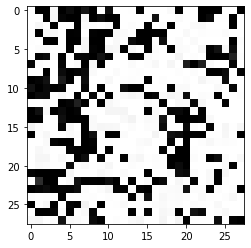

In [28]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

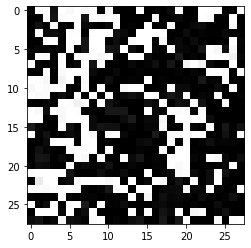

In [29]:
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [30]:
model.predict_classes(img)

/Users/kimberlyflores/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0])

In [34]:
filepath = "64-gray/waldo/18_2_15.jpg"

In [35]:
from keras.preprocessing import image
image_size = (28,28)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im

In [36]:
# divide all pixels by 255
image /= 255

TypeError: unsupported operand type(s) for /=: 'module' and 'int'

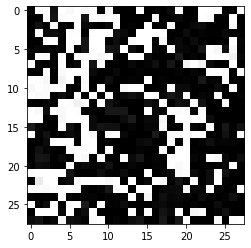

In [37]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

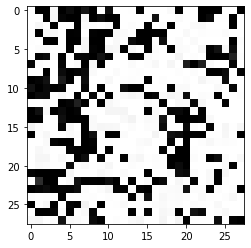

In [38]:
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [39]:
model.predict_classes(img)

array([0])